# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm

import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [3]:
path_to_save = './../results/02c_mass_analysis'

# Loading data

In [4]:
path_to_data= './../data/mass_ratios/fractions_mass_ratios.xlsx'

In [5]:
data = pd.read_excel(path_to_data)

print(data.shape)
data.head(3)

(8, 3)


,Membrane_Type,"Mass, mg","Ratio, %"
0,>70,13.0,1.868353
1,>25,26.7,3.837310
2,>5,623.5,89.609083


# Data wrangling

## Column names correction

In [6]:
columns_dict = {
    'Membrane_Type': 'membrane',
    'Mass, mg': 'mass',
    'Ratio, %': 'ratio'
}

In [7]:
data = data.rename(columns=columns_dict)

print(data.shape)
data.head(3)

(8, 3)


,membrane,mass,ratio
0,>70,13.0,1.868353
1,>25,26.7,3.837310
2,>5,623.5,89.609083


## Column values correction

In [8]:
data['membrane'] = data['membrane'].apply(lambda x: f'${x}$')
data['mass'] = data['mass'].apply(lambda x: round(x, 2))
data['ratio'] = data['ratio'].apply(lambda x: round(x, 2))

print(data.shape)
data.head(3)

(8, 3)


,membrane,mass,ratio
0,$>70$,13.0,1.87
1,$>25$,26.7,3.84
2,$>5$,623.5,89.61


# Data visualisation

In [9]:
sns.set_theme()

In [10]:
fontsize = 14

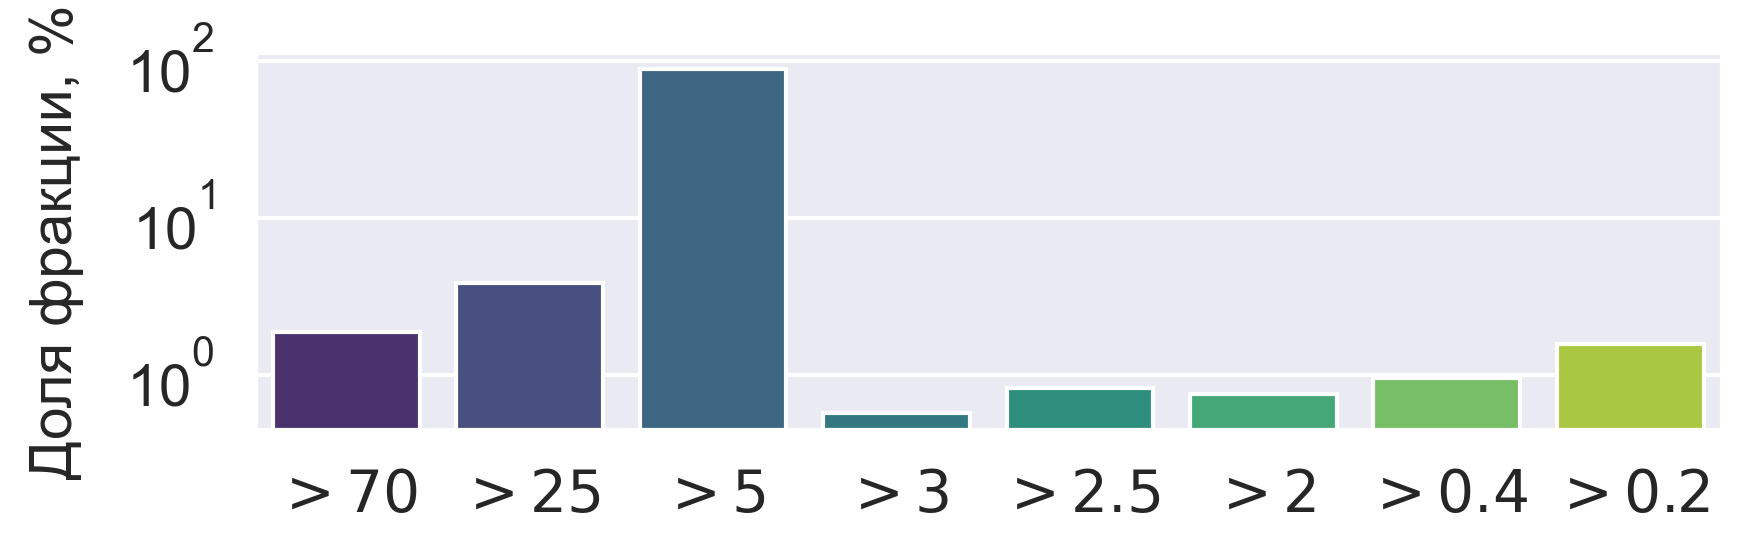

In [11]:
fig, ax = plt.subplots(figsize=(6, 2), dpi=300)

sns.barplot(
    data=data,
    x='membrane',
    y='ratio',
    palette='viridis',
    ax=ax
)

ax.set_xlabel('', fontsize=fontsize)
ax.set_ylabel('Доля фракции, %', fontsize=fontsize, labelpad=10)

ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

ax.set_yscale('log', base=10)

plt.tight_layout()

plt.savefig(f'{path_to_save}/mass_fractions_barplot.png', dpi=600)

plt.show()